<a href="https://colab.research.google.com/github/Bharatgaur/Projects/blob/main/1_HR_churn_Analysis_Exploratory_Data_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis (EDA)

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Loading the dataset from Github**

In [6]:
# Use the raw URL to access the file
url = 'https://raw.githubusercontent.com/Bharatgaur/Projects/main/hr_employee_churn_data.csv'

# Load the dataset
df = pd.read_csv(url)

In [7]:
#check the dataframe and its data
df.head()

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,1,0.38,0.53,2,157,3,0,0,low,1
1,2,0.80,0.86,5,262,6,0,0,medium,1
2,3,0.11,0.88,7,272,4,0,0,medium,1
3,4,0.72,0.87,5,223,5,0,0,low,1
4,5,0.37,0.52,2,159,3,0,0,low,1


In [8]:
#check dataframe structure like columns and its datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   empid                  14999 non-null  int64  
 1   satisfaction_level     14997 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  int64  
 4   average_montly_hours   14999 non-null  int64  
 5   time_spend_company     14999 non-null  int64  
 6   Work_accident          14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   salary                 14999 non-null  object 
 9   left                   14999 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 1.1+ MB


In [9]:
# check the num of rows and columns in dataframe
df.shape

(14999, 10)

In [10]:
df.describe()

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
count,14999.000000,14997.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7500.000000,0.612863,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,0.238083
std,4329.982679,0.248634,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,0.425924
min,1.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,3750.500000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,7500.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,11249.500000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,14999.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [11]:
df['Work_accident'].unique()

array([0, 1])

In [12]:
df['promotion_last_5years'].unique()

array([0, 1])

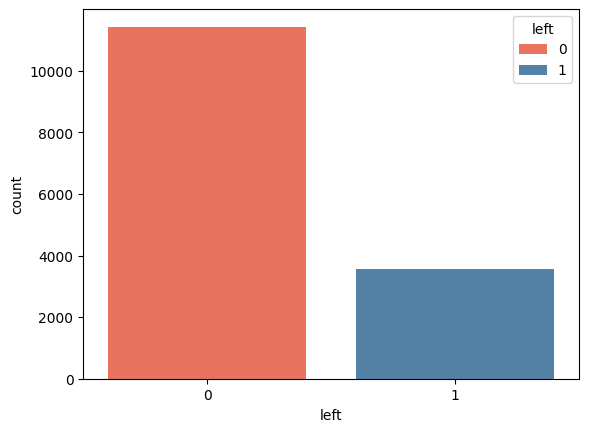

In [15]:
# check total employee range based on target column that left
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'left' column to a categorical type if it's not already
df['left'] = df['left'].astype('category')

# Create the countplot with 'hue' to match the categories in 'left'
sns.countplot(x='left', data=df, hue='left', palette=['#FF6347', '#4682B4'])

# Show the plot
plt.show()

#Take-away: in the training set, less people left than didn't.it seems there is data imbalance..

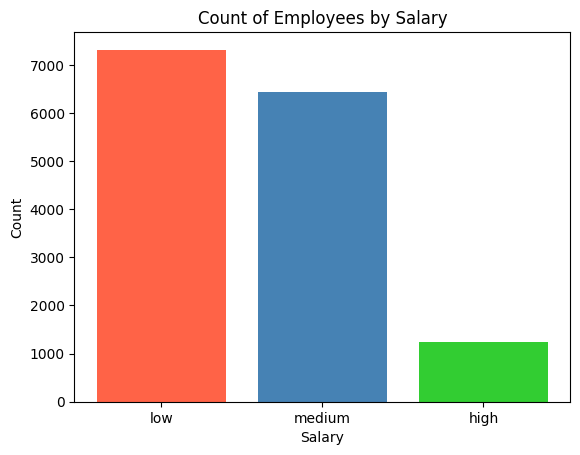

In [17]:
#feature 'salary'
# Define custom colors for each category
import pandas as pd
import matplotlib.pyplot as plt

# Count the occurrences of each category
salary_counts = df['salary'].value_counts()

# Create a bar plot using matplotlib
plt.bar(salary_counts.index, salary_counts.values, color=colors)

# Add labels and title
plt.xlabel('Salary')
plt.ylabel('Count')
plt.title('Count of Employees by Salary')

# Show the plot
plt.show()

#take-away: low salaried employee count is high in given dataset as expected

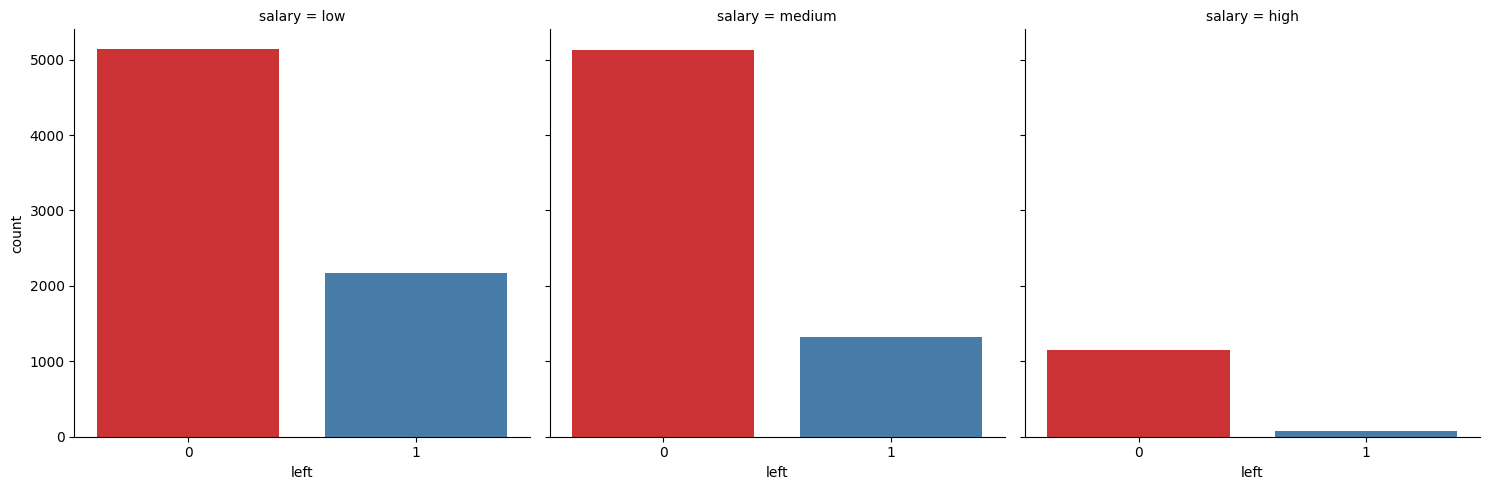

In [19]:
#feature 'left' split over the feature 'salary'.
import seaborn as sns
import matplotlib.pyplot as plt

# Create a catplot with count plots for each salary category
sns.catplot(x='left', hue='left', col='salary', kind='count', data=df, palette='Set1', legend=False)

# Show the plot
plt.show()

#Take-away: it seem low salaried employees have high churning rate

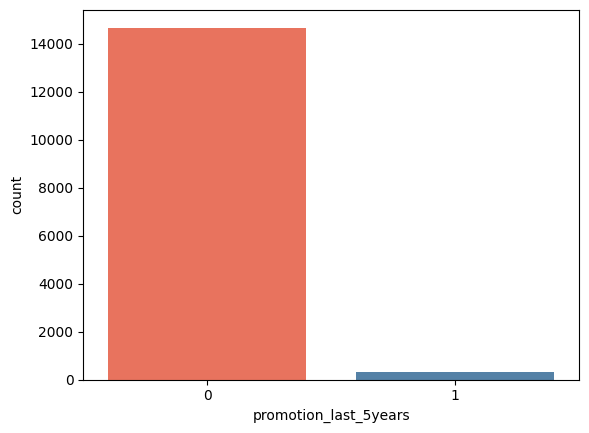

In [21]:
#feature 'promotion_last_5years'
import seaborn as sns
import matplotlib.pyplot as plt

# Define custom colors
custom_palette = ['#FF6347', '#4682B4']  # Example colors: Tomato, SteelBlue

# Create a count plot with custom colors
sns.countplot(x='promotion_last_5years', data=df, hue='promotion_last_5years', palette=custom_palette, legend=False)

# Show the plot
plt.show()


#take-away: non promoted emp count is high

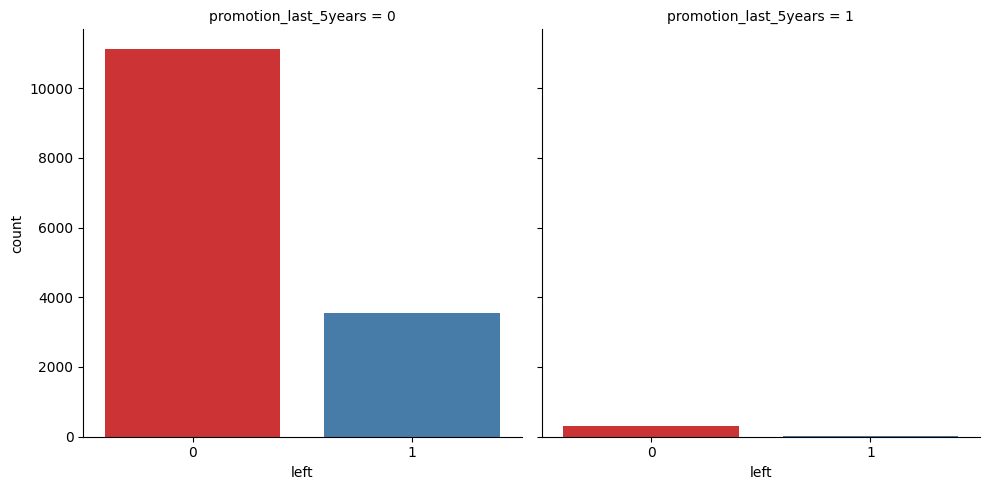

In [23]:
#feature 'left' split over the feature 'promotion_last_5years'.
#fig = plt.figure(figsize=(15,7))
import seaborn as sns
import matplotlib.pyplot as plt

# Create a catplot with count plots for each 'promotion_last_5years' category
sns.catplot(x='left', hue='left', col='promotion_last_5years', kind='count', data=df, palette='Set1', legend=False)

# Show the plot
plt.show()


#Take-away: it seems non promoted people left more

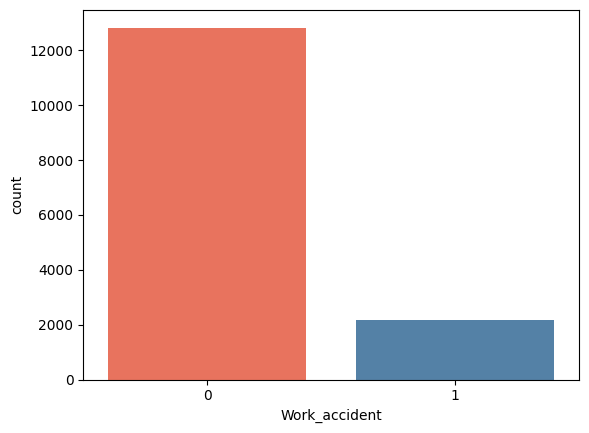

In [26]:
#feature 'Work_accident'
import seaborn as sns
import matplotlib.pyplot as plt

# Define custom colors
custom_palette = ['#FF6347', '#4682B4']  # Example colors: Tomato, SteelBlue

# Create a count plot with 'hue' set to the same variable to avoid FutureWarning
sns.countplot(x='Work_accident', hue='Work_accident', data=df, palette=custom_palette, legend=False)

# Show the plot
plt.show()



#take-away: have less people who made Work_accident

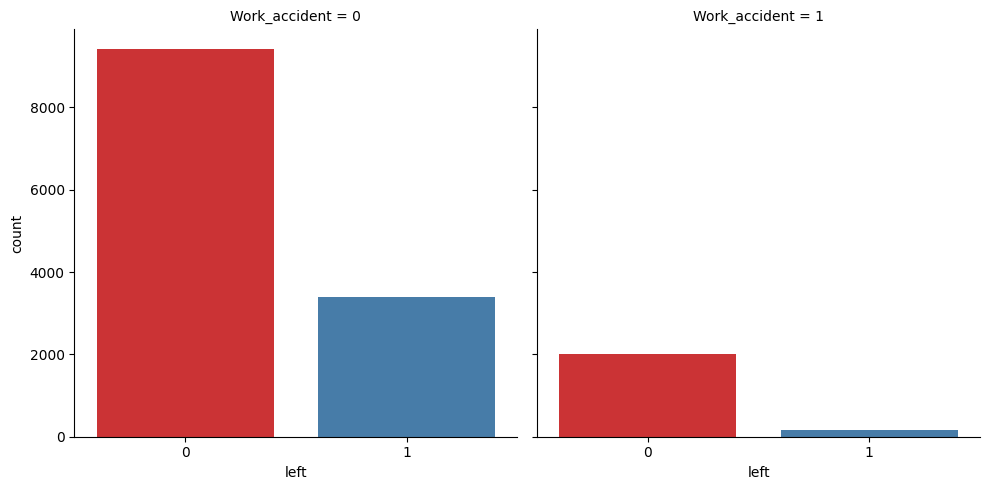

In [29]:
#feature 'left' split over the feature 'Work_accident'.
#fig = plt.figure(figsize=(15,7))
import seaborn as sns
import matplotlib.pyplot as plt

# Create a catplot with count plots for each 'Work_accident' category
sns.catplot(x='left', col='Work_accident', kind='count', data=df, hue='left', palette='Set1', legend=False)

# Show the plot
plt.show()

#Take-away: it seems people left more who did not made accident...we can say it is less imp feature

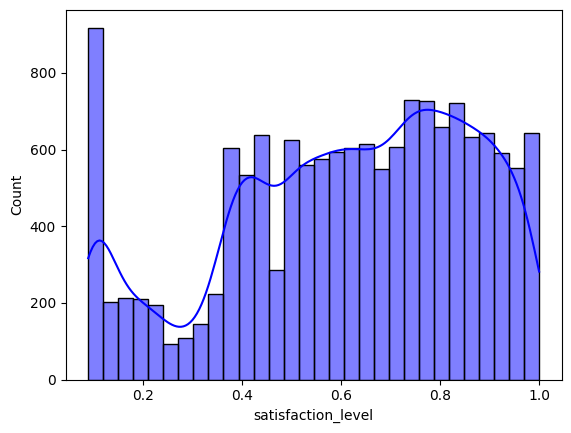

In [30]:
# satisfaction_level : plot a univariate distribution of observations
import seaborn as sns
import matplotlib.pyplot as plt

# Create a histogram with a kernel density estimate (KDE) for the 'satisfaction_level' column
sns.histplot(df['satisfaction_level'], kde=True, color='blue')

# Show the plot
plt.show()

#take-away: sl distributed from 0.1 to 1 where it has high count at 0.1

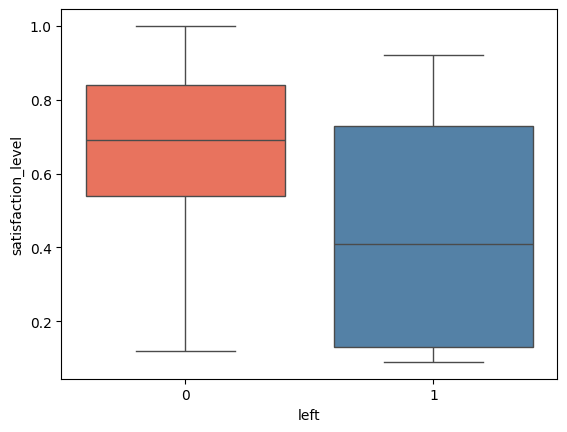

In [32]:
#box plot to show distributions with respect to categories
import seaborn as sns
import matplotlib.pyplot as plt

# Define custom colors
custom_palette = ['#FF6347', '#4682B4']  # Example colors: Tomato, SteelBlue

# Create a boxplot with 'hue' set to the same variable to avoid FutureWarning
sns.boxplot(x="left", y="satisfaction_level", data=df, hue="left", palette=custom_palette, legend=False)

# Show the plot
plt.show()

#take-away: employee left most who has less satisfication level range from 0.2 to 0.5

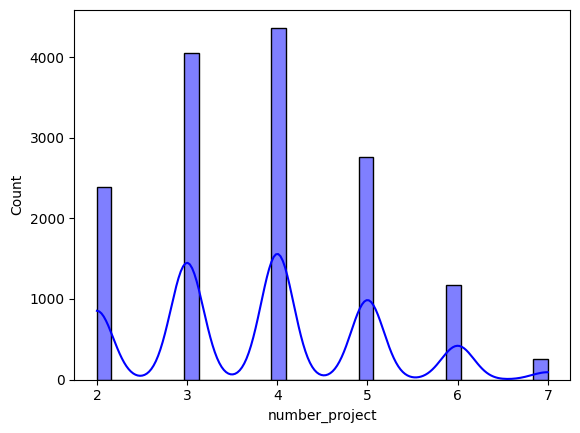

In [37]:
# number_project : plot a univariate distribution of observations
import seaborn as sns
import matplotlib.pyplot as plt

# Create a histogram with a KDE for the 'number_project' column
sns.histplot(df['number_project'], kde=True, color='blue')

# Show the plot
plt.show()

#take-away: number_project distributed from 2 to 7 where it has high count at 4

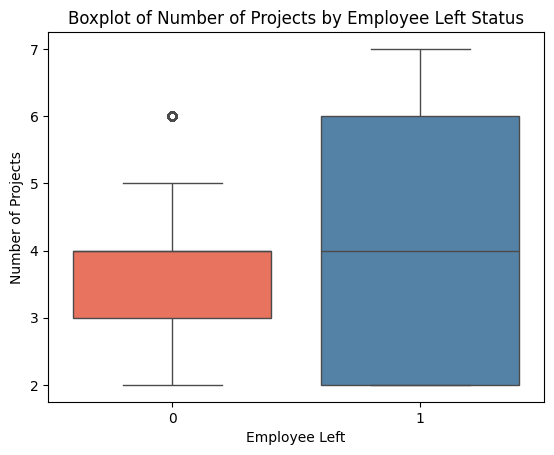

In [39]:
#box plot to show distributions with respect to categories
import seaborn as sns
import matplotlib.pyplot as plt

# Define custom colors for the boxplot
custom_palette = ['#FF6347', '#4682B4']  # Example colors: Tomato, SteelBlue

# Create a boxplot with 'hue' set to the same variable to avoid FutureWarning
sns.boxplot(x="left", y="number_project", data=df, hue="left", palette=custom_palette, legend=False)

# Show the plot
plt.title('Boxplot of Number of Projects by Employee Left Status')
plt.xlabel('Employee Left')
plt.ylabel('Number of Projects')
plt.show()


#take-away: employee left when project count high.and employee retain who has number_project between 3-4

<ipython-input-41-460c80949fd7>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['last_evaluation'])


<Axes: xlabel='last_evaluation', ylabel='Density'>

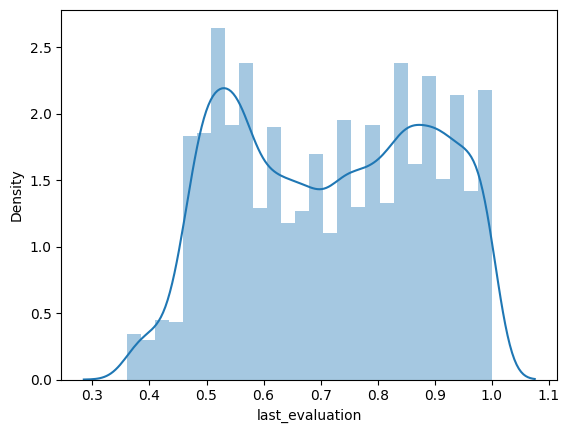

In [41]:
# last_evaluation : plot a univariate distribution of observations
sns.distplot(df['last_evaluation'])
#take-away: last_evaluation distributed from 0.35 to 1 where it has high count at around 0.55

<Axes: xlabel='left', ylabel='last_evaluation'>

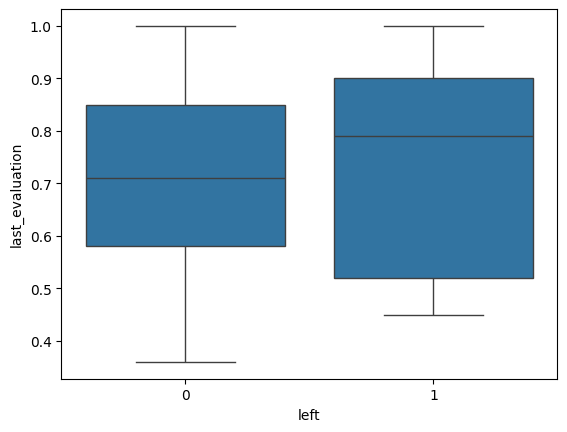

In [42]:
#box plot to show distributions with respect to categories
sns.boxplot(x="left", y= "last_evaluation", data=df)
#take-away: not much impact but employee left who has high last_evaluation value

<ipython-input-43-381bf19edfb7>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['average_montly_hours'])


<Axes: xlabel='average_montly_hours', ylabel='Density'>

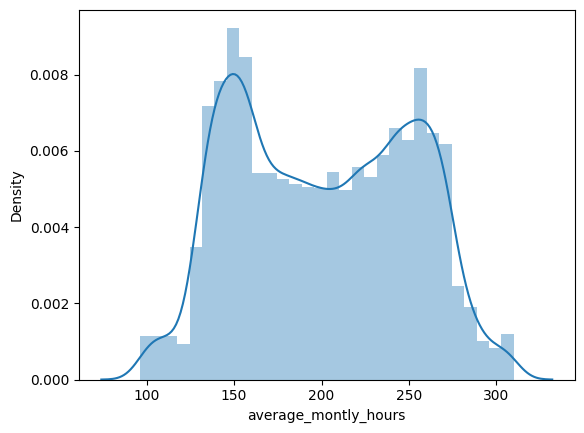

In [43]:
# average_montly_hours : plot a univariate distribution of observations
sns.distplot(df['average_montly_hours'])
#take-away: average_montly_hours distributed from 100 to 300 where it has high count at around 150

<Axes: xlabel='left', ylabel='average_montly_hours'>

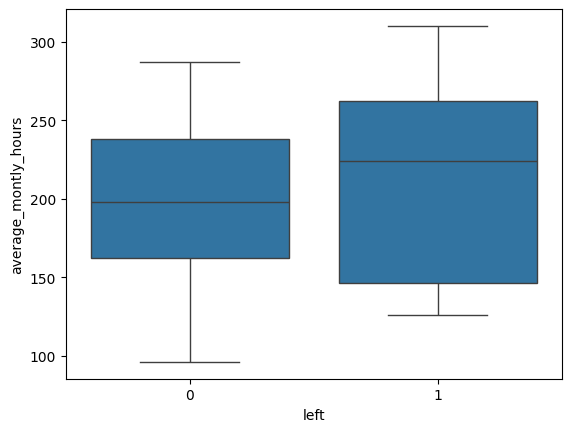

In [44]:
#box plot to show distributions with respect to categories
sns.boxplot(x="left", y= "average_montly_hours", data=df)
#take-away: employee left who has high average_montly_hours value

<ipython-input-45-effaf663a140>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['time_spend_company'])


<Axes: xlabel='time_spend_company', ylabel='Density'>

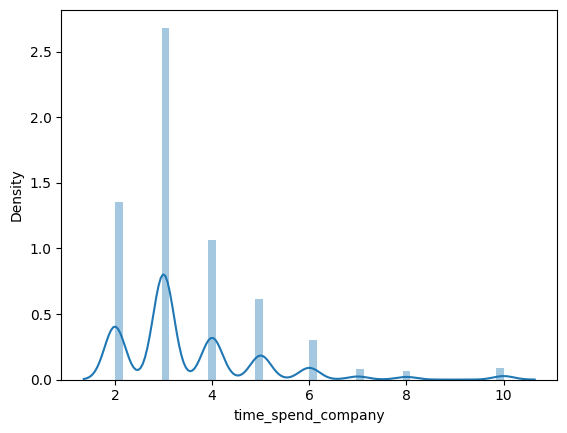

In [45]:
# time_spend_company : plot a univariate distribution of observations
sns.distplot(df['time_spend_company'])
#take-away: time_spend_company distributed from 2 to 10 where it has high count at around 3 and low at 9

<Axes: xlabel='left', ylabel='time_spend_company'>

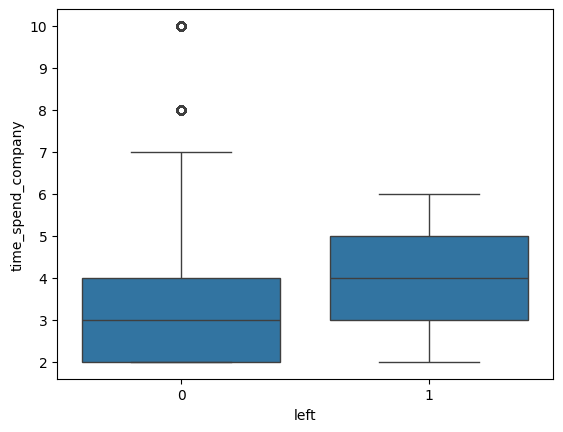

In [46]:
#box plot to show distributions with respect to categories
sns.boxplot(x="left", y= "time_spend_company", data=df)
#take-away: employee left who has high time_spend_company value...

In [47]:
## Checking for correlation
cor_mat=df.corr()
fig = plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True)

ValueError: could not convert string to float: 'low'

In [48]:
print(df.dtypes)

empid                       int64
satisfaction_level        float64
last_evaluation           float64
number_project              int64
average_montly_hours        int64
time_spend_company          int64
Work_accident               int64
promotion_last_5years       int64
salary                     object
left                     category
dtype: object


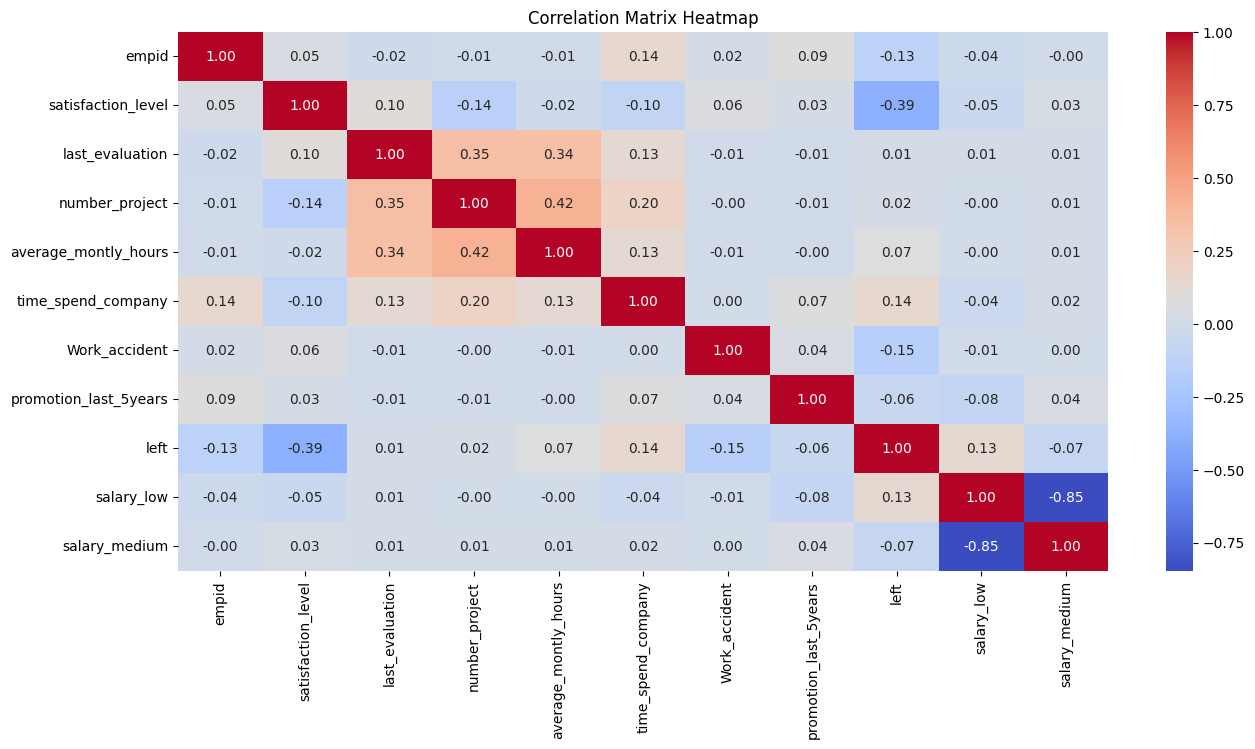

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'salary' to numeric using one-hot encoding
df = pd.get_dummies(df, columns=['salary'], drop_first=True)

# Convert 'left' to numeric (already category type, so it's fine as is)
# 'left' will be converted to 0 and 1 automatically as it's a categorical type

# Compute the correlation matrix
cor_mat = df.corr()

# Plot the heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(cor_mat, annot=True, cmap='coolwarm', fmt='.2f')

# Show the plot
plt.title('Correlation Matrix Heatmap')
plt.show()


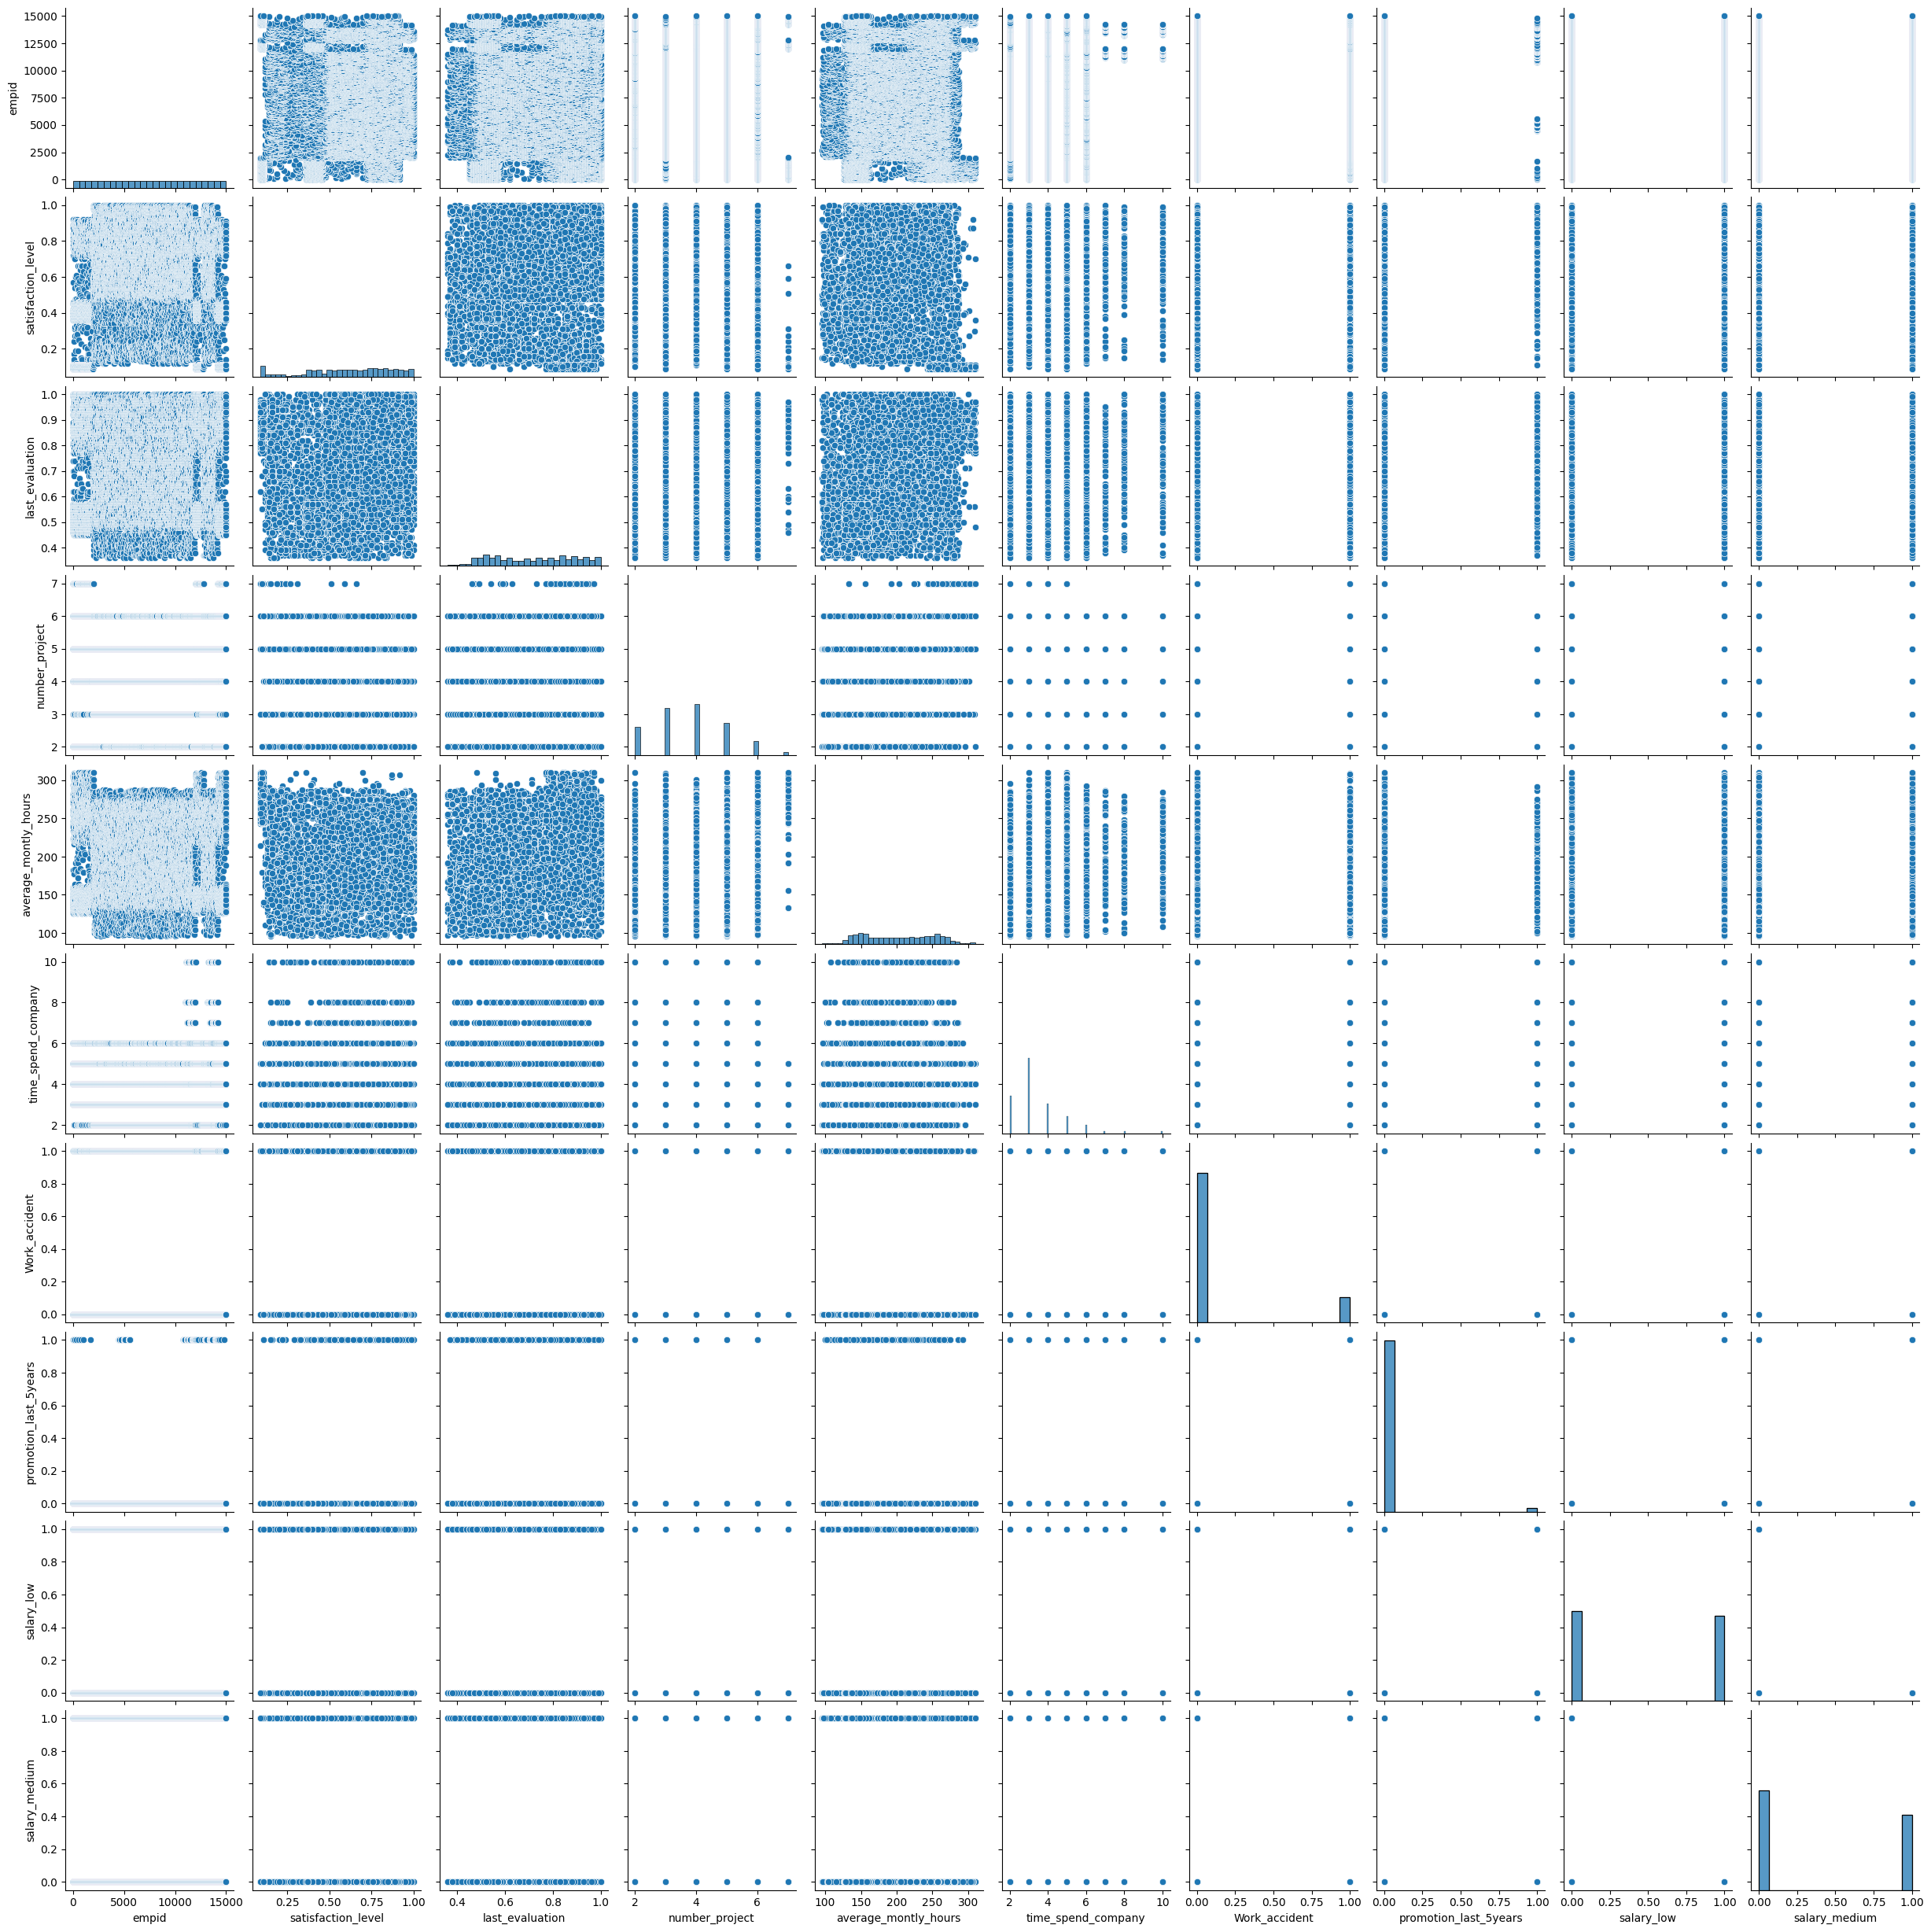

In [50]:
## Checking for pairplot
sns.pairplot(df)